In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "Resources/WT v FREQ - 15.csv"

In [3]:
df = pd.read_csv(file)
df.head()

,EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,WEIGHT IN POUNDS - RECODE,Total %,Total % SE,Total % CI (lower),Total % CI (upper),Row %,Row % SE,Row % CI (lower),Row % CI (upper),Column %,Column % SE,Column % CI (lower),Column % CI (upper),Weighted Count,Unweighted Count,Count SE
0,1 - Prefer to answer in days per week,100,0.001711,0.000421,0.001043,0.002805,0.324874,0.109969,0.149501,0.568465,0.004902,0.001186,0.003013,0.007964,59812.87182,26,14612.710370
1,1 - Prefer to answer in days per week,101,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.00000,0,0.000000
2,1 - Prefer to answer in days per week,102,0.000399,0.000165,0.000174,0.000914,0.776773,0.124486,0.451393,0.936372,0.001143,0.000472,0.000498,0.002620,13945.44560,6,5750.217377
3,1 - Prefer to answer in days per week,103,0.000436,0.000192,0.000180,0.001056,0.304545,0.127994,0.115111,0.595819,0.001249,0.000554,0.000512,0.003041,15238.28413,6,6727.309789
4,1 - Prefer to answer in days per week,104,0.000335,0.000194,0.000105,0.001072,0.421609,0.171647,0.150590,0.749817,0.000961,0.000554,0.000301,0.003059,11723.96599,4,6774.698051


In [4]:
new_df = df[['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH',
             'WEIGHT IN POUNDS - RECODE',
            'Unweighted Count']]
new_df.reset_index

new_df.head()

,EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,WEIGHT IN POUNDS - RECODE,Unweighted Count
0,1 - Prefer to answer in days per week,100,26
1,1 - Prefer to answer in days per week,101,0
2,1 - Prefer to answer in days per week,102,6
3,1 - Prefer to answer in days per week,103,6
4,1 - Prefer to answer in days per week,104,4


In [5]:
new_df[['WEIGHT IN POUNDS - RECODE', 'Unweighted Count']] = new_df[['WEIGHT IN POUNDS - RECODE', 'Unweighted Count']].astype(float)
new_df['Total Weight'] = np.multiply(new_df['WEIGHT IN POUNDS - RECODE'], new_df['Unweighted Count'])
new_df.head()

C:\Users\garyf\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\garyf\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,WEIGHT IN POUNDS - RECODE,Unweighted Count,Total Weight
0,1 - Prefer to answer in days per week,100.0,26.0,2600.0
1,1 - Prefer to answer in days per week,101.0,0.0,0.0
2,1 - Prefer to answer in days per week,102.0,6.0,612.0
3,1 - Prefer to answer in days per week,103.0,6.0,618.0
4,1 - Prefer to answer in days per week,104.0,4.0,416.0


In [6]:
total_weight = new_df.groupby(['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH'])['Total Weight'].sum()
total_count = new_df.groupby(['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH'])['Unweighted Count'].sum()
avg_weight = total_weight/total_count
status = new_df.groupby(['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH'])
avg_weight

EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH
1 - Prefer to answer in days per week     170.639581
2 - Prefer to answer in days per month    168.547779
3 - Prefer to answer in days per year     171.463004
dtype: float64

In [7]:
final_df = pd.DataFrame({"Average Weight": avg_weight}).round(1)
final_df

,Average Weight
EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,
1 - Prefer to answer in days per week,170.6
2 - Prefer to answer in days per month,168.5
3 - Prefer to answer in days per year,171.5


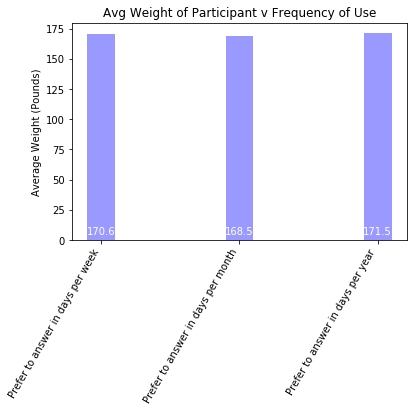

In [10]:
fig, ax = plt.subplots()
index = np.arange(len(avg_weight)) 
bar_width = 0.2
opacity = 0.4
error_config = {'ecolor': '0.3'}



rects1 = ax.bar(index, avg_weight, bar_width,
               alpha=opacity, color='b',
               error_kw=error_config,
               )



ax.set_ylabel("Average Weight (Pounds)")
ax.set_title("Avg Weight of Participant v Frequency of Use")
ax.set_xticks(index)
ax.set_xticklabels(('Prefer to answer in days per week', 'Prefer to answer in days per month','Prefer to answer in days per year'), rotation=60,ha='right')

def autolabelPass(rects1):
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%.1f' % float(height),
                ha='center', va='bottom', color="white")

autolabelPass(rects1)

plt.show()